In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib
from scipy.stats import skew
from scipy.stats import boxcox
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [6]:
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
gradeof software,19,17,16,17,16
grade of questionnaire score(EQ),5,4,3,4,4


In [7]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [8]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [9]:
X = df.drop("target", axis = 1)
y = df["target"]

In [10]:
X.shape

(100, 3)

In [11]:
y.shape

(100,)

In [12]:
X.head()

,education,gender,EQ
0,1,1,148
1,1,1,131
2,1,1,126
3,1,1,135
4,1,1,132


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(max_features='auto',n_jobs=-1, random_state=1)
params = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]
         }
GS = GridSearchCV(estimator=rf, param_grid=params, cv=5,n_jobs=-1)
GS= GS.fit(X_train,y_train)
print(GS.best_score_)
print(GS.best_params_)

0.8933333333333333
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=120, 
                            min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.72

In [15]:
rf = RandomForestClassifier(criterion='gini', n_estimators=120, 
                            min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.72

In [16]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[3 3 0 0 0]
 [0 1 0 0 0]
 [0 1 7 1 0]
 [0 0 1 6 0]
 [0 0 0 1 1]]
0.72


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         6
           2       0.20      1.00      0.33         1
           3       0.88      0.78      0.82         9
           4       0.75      0.86      0.80         7
           5       1.00      0.50      0.67         2

   micro avg       0.72      0.72      0.72        25
   macro avg       0.77      0.73      0.66        25
weighted avg       0.85      0.72      0.75        25



In [18]:
print('The accuracy of the RF classifier is {:.4f} on training data'.format(rf.score(X_train, y_train)))
print('The accuracy of the RF classifier is {:.4f} on test data'.format(rf.score(X_test, y_test)))

The accuracy of the RF classifier is 1.0000 on training data
The accuracy of the RF classifier is 0.7200 on test data


____

Text(0.5,15,'Predicted label')

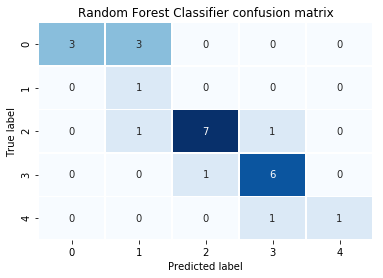

In [21]:
cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None, cmap="Blues")
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')